# Agentic RAG
Enhances traditional RAG (Retrieval Augmented Generation) with intelligent agents to handle complex tasks and make decisions dynamically


### Flow of a Traditional RAG:
1. User asks a query
2. Query is passed to DB which provides some kind of context
3. Context is combined with prompt and passed to LLM
4. LLM provides the final output

The LLM is specifically used only one time in a traditional RAG, only to generate an output. 

### How is Agentic RAG different than Traditional RAG:
Traditional RAGs fail in case of having to retrieve information from multiple databases.<br>
So, the solution Agentic RAG provides is to incorporate an Agent to read the user's query.<br> 
The agent will read user input and determine which DB to query the result from thus .<br>

### Flow of an Agentic RAG:
1. User asks a query
2. The Query Agent wrt query determines which DB to pass the query to 
3. Query is passed to that specific DB which provides some context
4. Context is then passed to LLM to determine if it is accurate wrt the query
5. If yes, then LLM provides a relevant summary.
6. If no, then we rewrite the entire query i.e. repeat from step 2

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["MISTRAL_API_KEY"]=os.getenv("MISTRAL_API_KEY")
from langchain_groq import ChatGroq
llm = ChatGroq(model= "gemma2-9b-it")

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter as RCTS 
from langchain_community.vectorstores import FAISS
from langchain_mistralai import MistralAIEmbeddings

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls=[
    "https://langchain-ai.github.io/langgraph/concepts/why-langgraph/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n       

In [4]:
doc_list = [item for sublist in docs for item in sublist]
doc_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        

In [5]:
splitter = RCTS(chunk_size = 1000, chunk_overlap= 100)
docs_split = splitter.split_documents(doc_list)

In [6]:
vectorstore = FAISS.from_documents(docs_split, MistralAIEmbeddings())
retriever = vectorstore.as_retriever()

d:\HCL Tech\Udemy\Gen AI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\HCL Tech\Udemy\Gen AI\venv\Lib\site-packages\langchain_mistralai\embeddings.py:181: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [7]:
# Retriever to retriever tool
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(retriever, name = "retriever_vector_db_blog", description = "Search and run information about LangGraph")
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about LangGraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000251FF47FF60>, retriever=VectorStoreRetriever(tags=['FAISS', 'MistralAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000251C725BE30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000251C6F91080>, retriever=VectorStoreRetriever(tags=['FAISS', 'MistralAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000251C725BE30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_conten

In [8]:
langchain_urls=[
    "https://python.langchain.com/docs/introduction/",
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/concepts/why_langchain/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n       

In [9]:
doc_list = [item for sublist in docs for item in sublist]
doc_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        

In [10]:
splitter = RCTS(chunk_size = 1000, chunk_overlap= 100)
docs_split = splitter.split_documents(doc_list)

In [11]:
vectorstore_langchain = FAISS.from_documents(docs_split, MistralAIEmbeddings())
langchain_retriever = vectorstore_langchain.as_retriever()

In [12]:
# Retriever to retriever tool
from langchain.tools.retriever import create_retriever_tool
langchain_retriever_tool = create_retriever_tool(langchain_retriever, name = "retriever_vector_langchain_blog", description = "Search and run information about LangChain")
langchain_retriever_tool

Tool(name='retriever_vector_langchain_blog', description='Search and run information about LangChain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000251FF47FF60>, retriever=VectorStoreRetriever(tags=['FAISS', 'MistralAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000251C5BB9490>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000251C6F91080>, retriever=VectorStoreRetriever(tags=['FAISS', 'MistralAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000251C5BB9490>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page

In [13]:
tools = [langchain_retriever_tool, retriever_tool]

In [14]:
# creating the agentic workflow

from typing_extensions import Annotated, TypedDict, Sequence
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages 

class AgentState(TypedDict):
    messages: Annotated[Sequence[AnyMessage], add_messages]

In [15]:
from langchain_groq import ChatGroq

In [ ]:
def agent(state):
    """
    Invoke the agent model to generate a response based on the current state. Given the question,
    it will decide to retrieve using the retriever tool, or simply end.
    
    Args:
        state(messages): The current state
        
    Returns:
        dict: updated state with the agent response appended to messages
    """
    print("---CALL_AGENT---")
    print("state messages: ",state["messages"])
    messages = state["messages"]
    model = ChatGroq(model = "qwen/qwen3-32b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # print("model with tools response: ",response)
    return {"messages":[response]}

In [17]:
from langchain_core.messages import HumanMessage
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from typing_extensions import Literal
from pydantic import BaseModel, Field
from langchain import hub


In [18]:
def grade_documents(state) -> Literal["rewrite", "generate"]:
    """
    Determines whether the retrieved documents are relevant to the question.
    
    Args:
        state["messages"]: The current state
        
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("---CHECK_REVELANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check"""
        binary_score: str = Field(description = "Relevance score 'yes' or 'no'")
    
    # LLM
    model = ChatGroq(model = "qwen/qwen3-32b")

    # LLM with tools and validation
    llm_with_tool = model.with_structured_output(grade)

    prompt = PromptTemplate(
        template= 
        """
        You are a grader assessing relevance of a retrieved document to a user question.\n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: \n\n {question} \n\n
        If the document keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score "yes" or "no" to indicate whether the document is relevant to the question.
        """,
        input_variables=["context", "question"]
    )

    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content

    docs = last_message.content

    scored_result = chain.invoke({"question":question, "context":docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DOCS_RELEVANT---")
        return "generate"
    else: 
        print("---DOCS_IRRELEVANT---")
        return "rewrite"
    

In [19]:
def generate(state):
    """
    Generate Answer

    Args:
        state(messages): The current state

    Returns:
        dict: The updated message   
    """

    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    prompt = PromptTemplate(template="""
    Use the following context to answer the question.\n\n

        Context: \n
        {context} \n\n

        Question:\n
        {question}\n\n
                            """)

    llm = ChatGroq(model= "qwen/qwen3-32b")
    rag_chain = prompt|llm|StrOutputParser()

    response = rag_chain.invoke({"context":docs, "question":question})
    return {"messages":[response]}

    

In [ ]:
def rewrite(state):
    """
    Transform the query to perform a better question

    Args:
        state(messages): the current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM_QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(content = f""" 
            Look at the input and try to reason about the underlying semantic intent or meaning.\n
            here is the initial question:\n
            {question} \n
            formulate the improved question:""")
    ]

    llm = ChatGroq(model= "qwen/qwen3-32b")
    response = llm.invoke(msg)
    # print("rewrite response: ",response)
    return {"message": [response]}

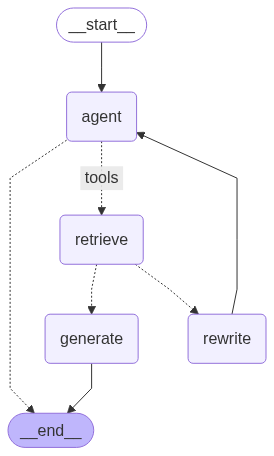

In [23]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node("generate", generate)  

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent",tools_condition,{"tools": "retrieve",END: END})
workflow.add_conditional_edges("retrieve",grade_documents)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [24]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL_AGENT---
state messages:  [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='cec0b0f4-0d9f-4d1f-aba5-52e3ea19f2c6')]
model with tools response:  content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" First, I need to figure out which tool to use here. There are two retrievers available: one for the LangChain blog and another for the DB blog. Since Langgraph is likely related to LangChain, given the name similarity, I should use the retriever_vector_langchain_blog function. The query parameter should be "Langgraph" to look up relevant information. I\'ll structure the tool call with that query.\n', 'tool_calls': [{'id': 'gwpa8a7yr', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 218, 'total_tokens': 346, 'completion_time': 0.258335279, 'prompt_time': 

{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='cec0b0f4-0d9f-4d1f-aba5-52e3ea19f2c6'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" First, I need to figure out which tool to use here. There are two retrievers available: one for the LangChain blog and another for the DB blog. Since Langgraph is likely related to LangChain, given the name similarity, I should use the retriever_vector_langchain_blog function. The query parameter should be "Langgraph" to look up relevant information. I\'ll structure the tool call with that query.\n', 'tool_calls': [{'id': 'gwpa8a7yr', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 218, 'total_tokens': 346, 'completion_time': 0.258335279, 'prompt_time': 0.008364519, 'queue_time': 0.051548

In [25]:
graph.invoke({"messages":"What is Langchain?"})

---CALL_AGENT---
state messages:  [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='c5785a80-7136-410a-86f2-f76f1d548275')]
model with tools response:  content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langchain?" I need to figure out which tool to use here. Let me check the available functions. There are two retrievers: one for the Langchain blog and another for a database blog. Since the question is about Langchain itself, the Langchain blog retriever seems more appropriate. The user probably wants information directly from Langchain\'s sources. I\'ll use the retriever_vector_langchain_blog function with the query "What is Langchain?" to get the relevant information.\n', 'tool_calls': [{'id': 'kkezshkma', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 

{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='c5785a80-7136-410a-86f2-f76f1d548275'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langchain?" I need to figure out which tool to use here. Let me check the available functions. There are two retrievers: one for the Langchain blog and another for a database blog. Since the question is about Langchain itself, the Langchain blog retriever seems more appropriate. The user probably wants information directly from Langchain\'s sources. I\'ll use the retriever_vector_langchain_blog function with the query "What is Langchain?" to get the relevant information.\n', 'tool_calls': [{'id': 'kkezshkma', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 218, 'total_tokens': 358, 'completi

In [26]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL_AGENT---
state messages:  [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='0da0be7c-7178-4c03-9aa5-2248c211dbd4')]
model with tools response:  content='Machine learning is a subset of artificial intelligence (AI) that enables systems to learn patterns and make decisions from data without being explicitly programmed. It involves algorithms that improve their performance on a task through experience (i.e., exposure to more data over time). Key approaches include:\n\n1. **Supervised Learning**: Using labeled data to train models (e.g., classification, regression).\n2. **Unsupervised Learning**: Finding hidden patterns in unlabeled data (e.g., clustering, dimensionality reduction).\n3. **Reinforcement Learning**: Learning optimal actions through trial and error with rewards/punishments.\n\nApplications range from image recognition and natural language processing to recommendation systems and autonomous vehicles. Modern techniques li

{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='0da0be7c-7178-4c03-9aa5-2248c211dbd4'),
  AIMessage(content='Machine learning is a subset of artificial intelligence (AI) that enables systems to learn patterns and make decisions from data without being explicitly programmed. It involves algorithms that improve their performance on a task through experience (i.e., exposure to more data over time). Key approaches include:\n\n1. **Supervised Learning**: Using labeled data to train models (e.g., classification, regression).\n2. **Unsupervised Learning**: Finding hidden patterns in unlabeled data (e.g., clustering, dimensionality reduction).\n3. **Reinforcement Learning**: Learning optimal actions through trial and error with rewards/punishments.\n\nApplications range from image recognition and natural language processing to recommendation systems and autonomous vehicles. Modern techniques like deep learning (neural networks) ha